<a href="https://colab.research.google.com/github/rdassignies/intelligence_artificielle_outils/blob/main/Reseau_Neurones_Approximation_Fonction_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

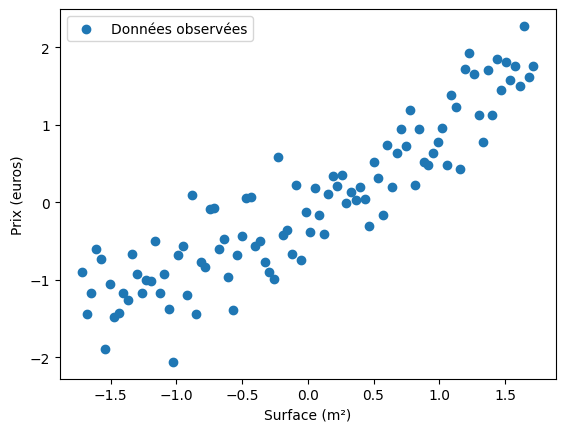

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données linéaires
np.random.seed(0)
surface = np.linspace(20, 200, 100)  # Surface en mètres carrés
prix = 3000 * surface + np.random.normal(0, 70000, surface.shape)  # Prix avec un peu de bruit

# Normalisation des données
surface = (surface - surface.mean()) / surface.std()
prix = (prix - prix.mean()) / prix.std()

# Affichage des données
plt.scatter(surface, prix, label='Données observées')
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (euros)')
plt.legend()
plt.show()


# Utilisation d'un réseau de neurones pour résoudre un problème simple de régression linéaire
Un réseau de neurones est une alternance de fonctions linéaires et non linéaires qui permet d'approximer (de découvrir) par un jeu d'essais/erreurs la fonction qui fournit la meilleure approximation du phénomène réel que l'on souhaite modéliser.

Dans le cas de la prévision du prix d'un appartement en fonction de la surface en mètres carrés, le réseau de neurones simplifié permet de découvrir :

Une simple droite si une seule couche est utilisée, c'est-à-dire une fonction affine avec une fonction d'activation.
Une fonction plus complexe qui suit la réalité de manière plus détaillée, mais avec le risque de surapprentissage.
Cette démonstration illustre que cette approche est très efficace pour modéliser des problèmes plus complexes et non linéaires, comme montré ci-dessous.

Pour aller plus loin :

**Fonctions linéaires et non linéaires** : Les réseaux de neurones combinent des transformations linéaires (produits matriciels et biais) avec des fonctions d'activation non linéaires (comme ReLU, Sigmoid, ou Tanh) pour capturer des relations complexes dans les données.

**Jeu d'essais/erreurs** : Le processus d'apprentissage consiste à ajuster les poids et les biais du réseau pour minimiser une fonction de perte à travers une méthode d'optimisation (comme la descente de gradient).

**Surapprentissage** : Un réseau de neurones trop complexe par rapport à la simplicité du problème peut mémoriser les données d'entraînement plutôt que de généraliser aux nouvelles données. Cela se traduit par une excellente performance sur l'ensemble d'entraînement mais une mauvaise performance sur les nouvelles données.

**Efficacité pour les problèmes non linéaires** : Les réseaux de neurones sont particulièrement puissants pour modéliser des relations non linéaires complexes, ce qui les rend adaptés à une large gamme de problèmes dans différents domaines.

Epoch [0/2000], Loss: 1.0060
Epoch [100/2000], Loss: 0.1475
Epoch [200/2000], Loss: 0.1445
Epoch [300/2000], Loss: 0.1427
Epoch [400/2000], Loss: 0.1407
Epoch [500/2000], Loss: 0.1384
Epoch [600/2000], Loss: 0.1371
Epoch [700/2000], Loss: 0.1353
Epoch [800/2000], Loss: 0.1369
Epoch [900/2000], Loss: 0.1335
Epoch [1000/2000], Loss: 0.1332
Epoch [1100/2000], Loss: 0.1323
Epoch [1200/2000], Loss: 0.1334
Epoch [1300/2000], Loss: 0.1320
Epoch [1400/2000], Loss: 0.1317
Epoch [1500/2000], Loss: 0.1304
Epoch [1600/2000], Loss: 0.1307
Epoch [1700/2000], Loss: 0.1299
Epoch [1800/2000], Loss: 0.1291
Epoch [1900/2000], Loss: 0.1868


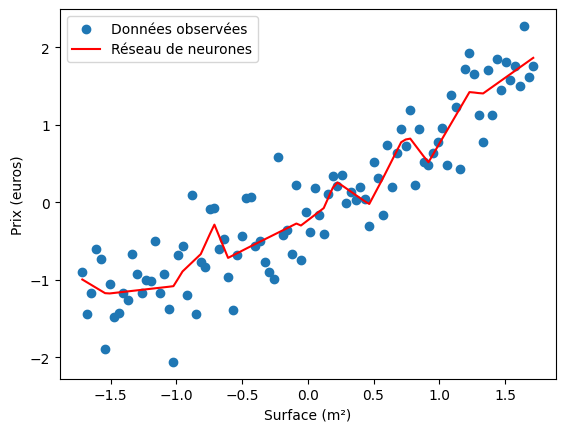

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Préparation des données
X = surface.reshape(-1, 1).astype(np.float32)
y = prix.reshape(-1, 1).astype(np.float32)

# Conversion en tenseurs PyTorch
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# Définition du modèle complexe
class ComplexNeuralNetwork(nn.Module):
    def __init__(self):
        super(ComplexNeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(1, 40) # On peut ajuster le nombre de paramètres pour illustrer l'overfitting
        self.hidden2 = nn.Linear(40, 40)
        self.output = nn.Linear(40, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
model = ComplexNeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Entraînement du modèle
epochs = 2000 # On peut ajuster les epochs pour illustrer le sur apprentissage
for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Prédictions
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).numpy()

# Affichage des résultats
plt.scatter(surface, prix, label='Données observées')
plt.plot(surface, predictions, color='red', label='Réseau de neurones')
plt.xlabel('Surface (m²)')
plt.ylabel('Prix (euros)')
plt.legend()
plt.show()


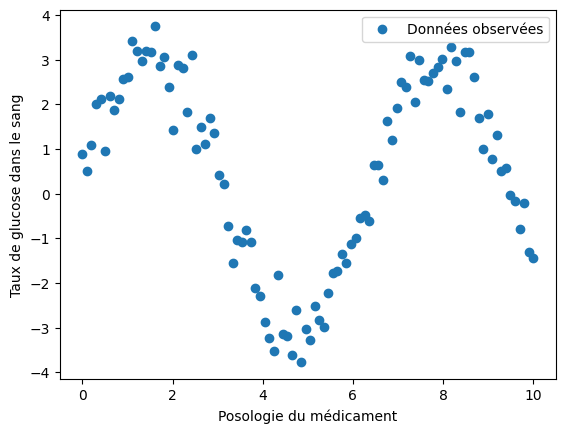

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données non linéaires
np.random.seed(0)
posologie = np.linspace(0, 10, 100)
glucose = 3 * np.sin(posologie) + np.random.normal(0, 0.5, posologie.shape)

# Normalisation des données
#posologie = (posologie - posologie.mean()) / posologie.std()
#glucose = (glucose - glucose.mean()) / glucose.std()

# Affichage des données
plt.scatter(posologie, glucose, label='Données observées')
plt.xlabel('Posologie du médicament')
plt.ylabel('Taux de glucose dans le sang')
plt.legend()
plt.show()


Epoch [0/2000], Loss: 5.7488
Epoch [1000/2000], Loss: 0.1660


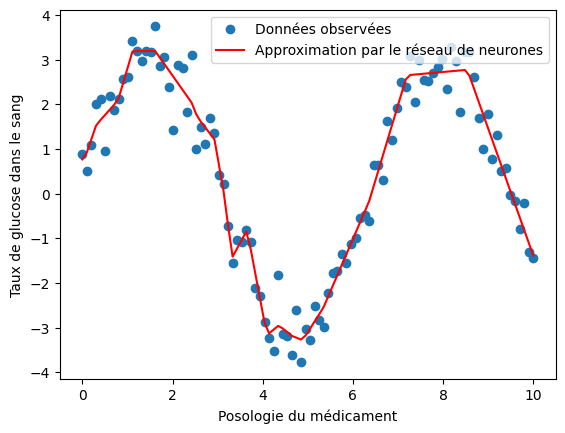

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Préparation des données
X = posologie.reshape(-1, 1).astype(np.float32)
y = glucose.reshape(-1, 1).astype(np.float32)

# Conversion en tenseurs PyTorch
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y)

# Définition du modèle
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(1, 40) # On peut changer cette ligne pour ajuster les paramètres
        self.hidden2 = nn.Linear(40, 40)
        self.output = nn.Linear(40, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Initialisation du modèle, de la fonction de perte et de l'optimiseur
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

# Entraînement du modèle
epochs = 2000
for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Prédictions
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).numpy()

# Affichage des résultats
plt.scatter(posologie, glucose, label='Données observées')
plt.plot(posologie, predictions, color='red', label='Approximation par le réseau de neurones')
plt.xlabel('Posologie du médicament')
plt.ylabel('Taux de glucose dans le sang')
plt.legend()
plt.show()
